<a href="https://colab.research.google.com/github/AKHILM20DS007/AKHILM20DS007/blob/main/Decision_tree_car_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Program on Decision_Tree

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
df=pd.read_csv("/content/drive/MyDrive/A# Dataset practise/car_evaluation (1).csv")

In [5]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [8]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [11]:
for col in col_names:
  print(df[col].value_counts())


high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [12]:
df['class'].value_counts()


unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [13]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [14]:
X = df.drop(['class'], axis=1)
y = df['class']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state
= 42)
X_train.shape

(1157, 6)

In [17]:
X_test.shape

(570, 6)

In [18]:
X_test

,buying,maint,doors,persons,lug_boot,safety
599,high,high,4,2,big,low
932,med,vhigh,4,4,big,low
628,high,high,5more,2,big,high
1497,low,high,5more,4,med,med
1262,med,low,4,more,med,low
...,...,...,...,...,...,...
1601,low,med,5more,4,small,low
1033,med,high,4,2,big,high
341,vhigh,low,2,more,small,low
147,vhigh,high,3,4,med,med


In [19]:
#Encode categorical variables using ordinal encoding
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [20]:
pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.9 MB/s 


In [23]:
import category_encoders as ce
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head()


,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [24]:
X_test.head()


,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


In [25]:
#print(X_test[buying].value_counts())

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [28]:
# fit the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [29]:
#Predict the Test set results with criterion entropy
y_pred = dtc.predict(X_test)
y_pred


array(['unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'a

In [31]:
#Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with criterion entropy: 0.8053


In [34]:
#Compare the train-set and test-set accuracy
#Now, we will compare the train-set(X_train) and test-set accuracy to check for overfitting.
y_pred_Xtrain = dtc.predict(X_train)
y_pred_Xtrain
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_Xtrain)))


Training-set accuracy score: 0.7848


In [35]:
#Check for overfitting and underfitting
#print the scores on training and test set
print('Test set score: {:.4f}'.format(dtc.score(X_test, y_test)))
print('Training set score: {:.4f}'.format(dtc.score(X_train, y_train)))

Test set score: 0.8053
Training set score: 0.7848


[Text(0.3333333333333333, 0.875, 'X[5] <= 1.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.5\nentropy = 1.484\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 2.5\nentropy = 1.639\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'entropy = 0.997\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 1.758\nsamples = 258\nvalue = [133, 51, 35, 39]')]

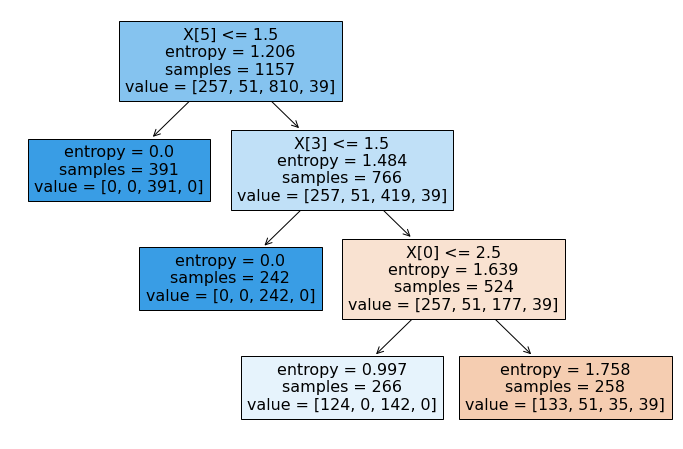

In [36]:
#Visualize decision-trees
plt.figure(figsize=(12,8))# 12=width & 8=height of figure in inches
from sklearn import tree
tree.plot_tree(dtc.fit(X_train, y_train),filled=True)


In [37]:
#Print the Confusion Matrix and slice it into four pieces# 4 values--unacc,acc,goog,vgood
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred,labels=["unacc", "acc", "good","vgood"])

In [38]:
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[388  11   0   0]
 [ 56  71   0   0]
 [  0  18   0   0]
 [  0  26   0   0]]


In [39]:
X_test

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1
...,...,...,...,...,...,...
1601,4,3,1,3,2,1
1033,3,2,3,1,3,3
341,1,4,4,2,2,1
147,1,2,2,3,1,2


In [40]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=200,max_depth=10)
rf.fit(X_train,y_train)
accuracy=rf.score(X_test,y_test)
accuracy

0.968421052631579